In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\car_age_price.csv') 
print(data.head()) 
print(data.isnull().sum())  

   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000
Year     0
Price    0
dtype: int64


In [4]:
data = data.dropna() 

print(data.dtypes)

X = data['Year'].values.reshape(-1, 1)  
y = data['Price'].values


Year     int64
Price    int64
dtype: object


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_linear = linear_regressor.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [8]:

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2: {r2_linear}")

Linear Regression MSE: 4326906256.829671
Linear Regression R^2: 0.36759313425902185


In [9]:
lasso_regressor = Lasso(alpha=0.1)  
lasso_regressor.fit(X_train, y_train)


y_pred_lasso = lasso_regressor.predict(X_test)

In [10]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")

Lasso Regression MSE: 4326901608.19506
Lasso Regression R^2: 0.36759381368868127


In [11]:

if mse_linear < mse_lasso:
    print("Linear Regression is performing better.")
else:
    print("Lasso Regression is performing better.")

Lasso Regression is performing better.


In [12]:
year_2022 = np.array([[2022]])
predicted_price_2022 = linear_regressor.predict(year_2022)

print(f"Predicted price for a 2022 Hyundai Grand i10: {predicted_price_2022[0]}")

Predicted price for a 2022 Hyundai Grand i10: 743601.6159450412


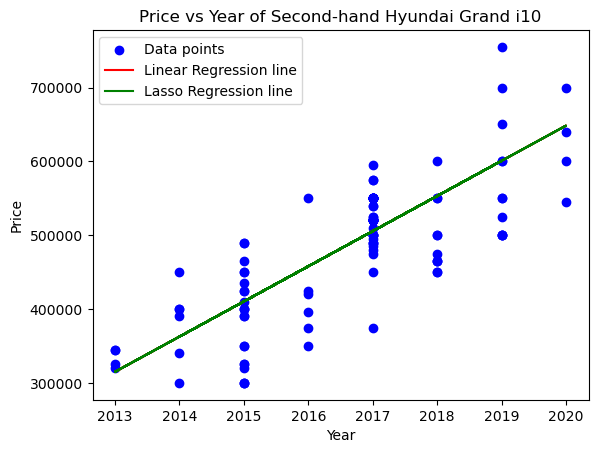

In [13]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, linear_regressor.predict(X), color='red', label='Linear Regression line')
plt.plot(X, lasso_regressor.predict(X), color='green', label='Lasso Regression line')
plt.title('Price vs Year of Second-hand Hyundai Grand i10')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()
